<Figure size 432x288 with 0 Axes>

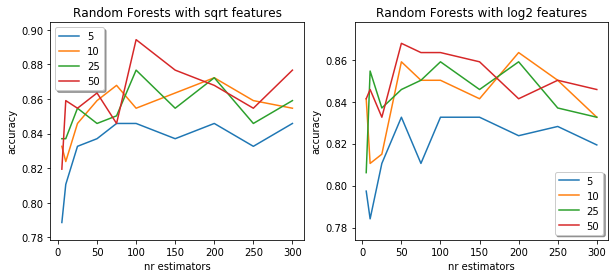

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
# import ipynb.fs.defs.functions as func

def multiple_line_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, miny=0.5, maxy=0.9, percentage=False):
    legend: list = []
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if percentage:
        ax.set_ylim(miny-0.01, maxy+0.01)
    for name, y in yvalues.items():
        ax.plot(xvalues, y)
        legend.append(name)
    ax.legend(legend, loc='best', fancybox = True, shadow = True) 

data: pd.DataFrame = pd.read_csv('dataset1/pd_speech_features_copy1.csv')
y: np.ndarray = data.pop('class').values
X: np.ndarray = data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [5, 10, 25, 50]
max_features = ['sqrt', 'log2']

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(10, 4), squeeze=False)
for k in range(len(max_features)):
    f = max_features[k]
    values = {}
    miny = 1
    maxy = 0
    for d in max_depths:
        yvalues = []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f)
            rf.fit(trnX, trnY)
            prdY = rf.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
        values[d] = yvalues
        if min(yvalues) < miny:
            miny = min(yvalues)
        if max(yvalues) > maxy:
            maxy = max(yvalues)
    multiple_line_chart(axs[0, k], n_estimators, values, 'Random Forests with %s features'%f, 'nr estimators', 
                             'accuracy', miny, maxy, percentage=True)
    
plt.show()

<Figure size 432x288 with 0 Axes>

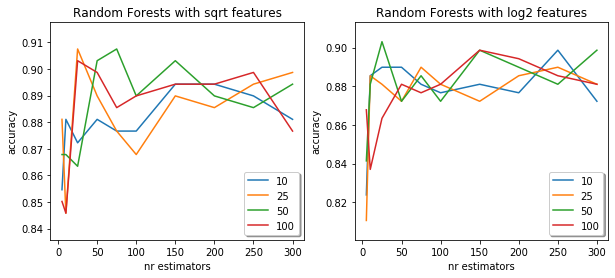

In [17]:
data: pd.DataFrame = pd.read_csv('dataset1/pd_speech_features_copy1.csv')
y: np.ndarray = data.pop('class').values
X: np.ndarray = data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [10, 25, 50, 100]
max_features = ['sqrt', 'log2']

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(10, 4), squeeze=False)
for k in range(len(max_features)):
    f = max_features[k]
    values = {}
    miny = 1
    maxy = 0
    for d in max_depths:
        yvalues = []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f)
            rf.fit(trnX, trnY)
            prdY = rf.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
        values[d] = yvalues
        if min(yvalues) < miny:
            miny = min(yvalues)
        if max(yvalues) > maxy:
            maxy = max(yvalues)
    multiple_line_chart(axs[0, k], n_estimators, values, 'Random Forests with %s features'%f, 'nr estimators', 
                             'accuracy', miny, maxy, percentage=True)
    
plt.show()

In [35]:
data = pd.read_csv('dataset1/pd_speech_features_copy1.csv', sep=',')
data = data.sort_values('id', ascending=True)
data = data.drop_duplicates(subset='id', keep='last')


data = data.groupby('id').mean().reset_index()

#FAzer a média das 3 medições
data = data.groupby('id').mean().reset_index()

print(data.shape)

(252, 755)


In [32]:
from sklearn.preprocessing import Normalizer

transf = Normalizer().fit(data)
norm_data = pd.DataFrame(transf.transform(data, copy=True), columns= data.columns)
norm_data.describe(include='all')
data = norm_data


In [36]:
import numpy as np

def multiple_bar_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False):

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    x = np.arange(len(xvalues))  # the label locations
    ax.set_xticks(x)
    ax.set_xticklabels(xvalues, fontsize='small')
    if percentage:
        ax.set_ylim(0.0, 1.0)
    width = 0.8  # the width of the bars
    step = width / len(yvalues)
    k = 0
    for name, y in yvalues.items():
        ax.bar(x + k * step, y, step, label=name)
        k += 1
    ax.legend(loc='lower center', ncol=len(yvalues), bbox_to_anchor=(0.5, -0.2), fancybox = True, shadow = True)    

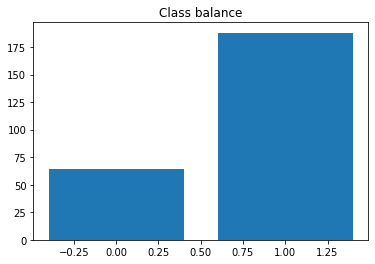

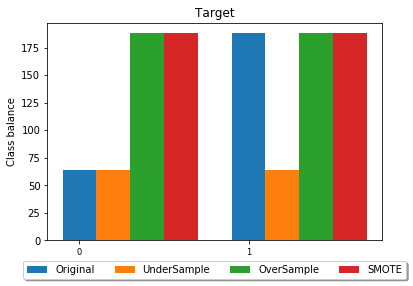

(252, 754)
(376, 755)


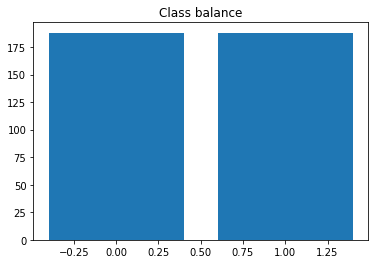

In [37]:
#Should have normalization and balancing...

#Balancing

unbal = data
target_count = unbal['class'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

from imblearn.over_sampling import SMOTE, RandomOverSampler

RANDOM_STATE = 42
values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = unbal[unbal['class'] == min_class]
df_class_max = unbal[unbal['class'] != min_class] 

df_under = df_class_max.sample(len(df_class_min))
values['UnderSample'] = [target_count.values[ind_min_class], len(df_under)]

df_over = df_class_min.sample(len(df_class_max), replace=True)
values['OverSample'] = [len(df_over), target_count.values[1-ind_min_class]]

smote = SMOTE(ratio='minority', random_state=RANDOM_STATE)

y = unbal.pop('class').values
X = unbal.values
smote_x, smote_y = smote.fit_sample(X, y)
smote_target_count = pd.Series(smote_y).value_counts()

#df_SMOTE = pd.concat([pd.DataFrame(smote_x), pd.DataFrame(smote_y)], axis=1)
df_SMOTE = pd.DataFrame(smote_x)
df_SMOTE.columns = unbal.columns
df_SMOTE['class'] = smote_y
#print(df_SMOTE.dtypes)
#print(smote_y)

values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

plt.figure()
multiple_bar_chart(plt.gca(), 
                        [target_count.index[ind_min_class], target_count.index[1-ind_min_class]], 
                        values, 'Target', 'frequency', 'Class balance')
plt.show()

print(data.shape)
print(df_SMOTE.shape)
data = df_SMOTE

#Drop lable

X = data.drop(columns=['class'])
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None, stratify=y)


#Use SMOTE?
target_count = data['class'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

<Figure size 432x288 with 0 Axes>

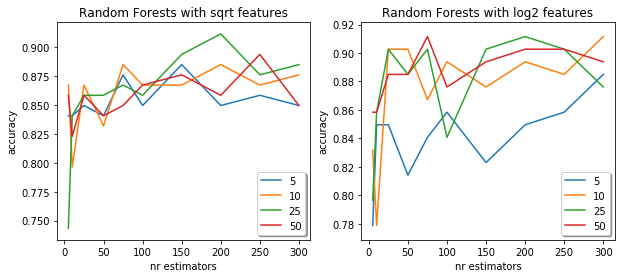

In [24]:
y: np.ndarray = data.pop('class').values
X: np.ndarray = data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [5, 10, 25, 50]
max_features = ['sqrt', 'log2']

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(10, 4), squeeze=False)
for k in range(len(max_features)):
    f = max_features[k]
    values = {}
    miny = 1
    maxy = 0
    for d in max_depths:
        yvalues = []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f)
            rf.fit(trnX, trnY)
            prdY = rf.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
        values[d] = yvalues
        if min(yvalues) < miny:
            miny = min(yvalues)
        if max(yvalues) > maxy:
            maxy = max(yvalues)
    multiple_line_chart(axs[0, k], n_estimators, values, 'Random Forests with %s features'%f, 'nr estimators', 
                             'accuracy', miny, maxy, percentage=True)
    
plt.show()

Explained variation per principal component: [0.13594905 0.09467827 0.08288573 0.04392787 0.0370504  0.03028843
 0.0250863  0.02411793 0.02292672 0.01927825 0.01887364 0.01715724
 0.01542288 0.01446004 0.01321621 0.01311567 0.01229814 0.01133584
 0.01057506 0.01027581 0.0099893  0.00890102 0.00873511 0.00790937
 0.00787719 0.00780665 0.00714363 0.00696641 0.00649586 0.00632369
 0.0060804  0.00584156 0.00574672 0.00530348 0.00513972 0.00505741
 0.00482347 0.00476646 0.00464001 0.00450945 0.00443679 0.00432037
 0.00415531 0.00387216 0.00386998 0.00381537 0.00376975 0.00362193
 0.00355859 0.00349477 0.00337685 0.00331025 0.00327744 0.00316854
 0.00309493 0.00303466 0.00294287 0.00288021 0.00284449 0.00280445
 0.00279975 0.00278175 0.00265058 0.00259239 0.00252595 0.00250146
 0.00244576 0.00240699 0.00237701 0.00233437 0.00230846 0.00226821
 0.00224274 0.00216846 0.00215731 0.00212668 0.00206337 0.00204895
 0.0020079  0.00198865 0.00192971 0.00188771 0.00187269 0.00185303
 0.00182247 0.001

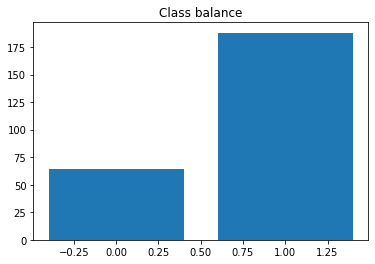

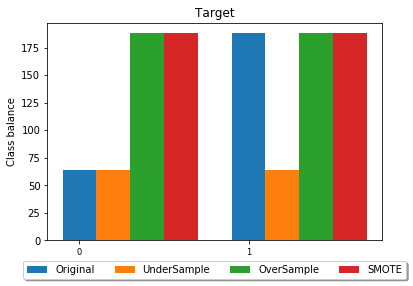

(252, 754)
(376, 755)


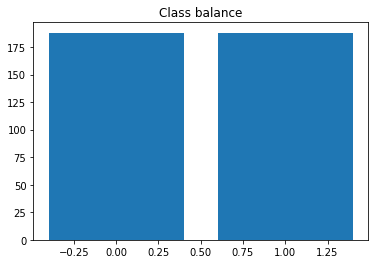

In [28]:
n_components = 100

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('dataset1/pd_speech_features_copy1.csv', sep=',')
data = data.sort_values('id', ascending=True)
data = data.drop_duplicates(subset='id', keep='last')


data = data.groupby('id').mean().reset_index()

#FAzer a média das 3 medições
data = data.groupby('id').mean().reset_index()

#transf = Normalizer().fit(data)
#norm_data = pd.DataFrame(transf.transform(data, copy=True), columns= data.columns)
#norm_data.describe(include='all')
#data = norm_data

data = pd.DataFrame(data)

features = data.columns

x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components)
pca.fit(data) 
X_pc = pca.fit_transform(x)
pca_df = pd.DataFrame(X_pc)


# number of components
#print(pca.components_)
n_pcs = pca.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [features[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

pca_df_named = pd.DataFrame(X_pc,columns = df[1])

pca_df_named.insert(n_components,'class', data['class'])

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

#print(df[1])

print(pca_df_named.head())
print('\n\n\n')

sel_data = pca_df_named

print(sel_data.head())

unbal = data
target_count = unbal['class'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

from imblearn.over_sampling import SMOTE, RandomOverSampler

RANDOM_STATE = 42
values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = unbal[unbal['class'] == min_class]
df_class_max = unbal[unbal['class'] != min_class] 

df_under = df_class_max.sample(len(df_class_min))
values['UnderSample'] = [target_count.values[ind_min_class], len(df_under)]

df_over = df_class_min.sample(len(df_class_max), replace=True)
values['OverSample'] = [len(df_over), target_count.values[1-ind_min_class]]

smote = SMOTE(ratio='minority', random_state=RANDOM_STATE)

y = unbal.pop('class').values
X = unbal.values
smote_x, smote_y = smote.fit_sample(X, y)
smote_target_count = pd.Series(smote_y).value_counts()

#df_SMOTE = pd.concat([pd.DataFrame(smote_x), pd.DataFrame(smote_y)], axis=1)
df_SMOTE = pd.DataFrame(smote_x)
df_SMOTE.columns = unbal.columns
df_SMOTE['class'] = smote_y
#print(df_SMOTE.dtypes)
#print(smote_y)

values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

plt.figure()
multiple_bar_chart(plt.gca(), 
                        [target_count.index[ind_min_class], target_count.index[1-ind_min_class]], 
                        values, 'Target', 'frequency', 'Class balance')
plt.show()

print(data.shape)
print(df_SMOTE.shape)
data = df_SMOTE

#Drop lable

X = data.drop(columns=['class'])
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None, stratify=y)


#Use SMOTE?
target_count = data['class'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)




<Figure size 432x288 with 0 Axes>

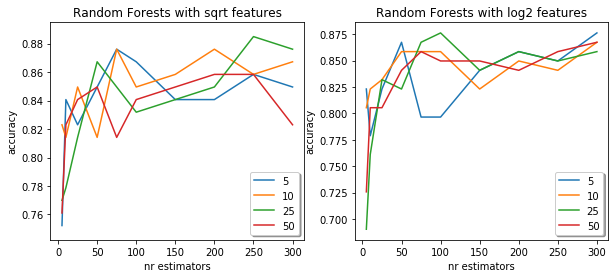

In [29]:
y: np.ndarray = data.pop('class').values
X: np.ndarray = data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [5, 10, 25, 50]
max_features = ['sqrt', 'log2']

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(10, 4), squeeze=False)
for k in range(len(max_features)):
    f = max_features[k]
    values = {}
    miny = 1
    maxy = 0
    for d in max_depths:
        yvalues = []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f)
            rf.fit(trnX, trnY)
            prdY = rf.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
        values[d] = yvalues
        if min(yvalues) < miny:
            miny = min(yvalues)
        if max(yvalues) > maxy:
            maxy = max(yvalues)
    multiple_line_chart(axs[0, k], n_estimators, values, 'Random Forests with %s features'%f, 'nr estimators', 
                             'accuracy', miny, maxy, percentage=True)
    
plt.show()